# Amphibole Thermobarometry and Chemometry
- This workbook demonstrates how to use the various amphibole-only, and amphibole-liquid functions
- You can download the excel spreadsheet with data here:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Amphibole/Amphibole_Liquids.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## Load python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Load data

In [3]:
out=pt.import_excel('Amphibole_Liquids.xlsx', sheet_name="Amp-Liq")
my_input=out['my_input']
Amps=out['Amps']
Liqs=out['Liqs']

## Checking data read in correctly (check no columns are full of zeros that you think you inputted)

In [4]:
display(Amps.head())
display(Liqs.head())

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,40.57,2.45,12.82,13.11,0.26,13.02,11.63,2.20,0.92,0.00,0,0,probe1
1,39.45,1.88,10.80,11.85,0.00,11.32,10.94,2.04,0.75,0.00,0,0,probe2
2,42.88,3.46,14.28,15.99,0.54,14.25,12.12,2.43,1.18,0.03,0,0,probe3
3,42.20,2.75,11.10,13.10,0.39,13.55,11.07,2.27,0.95,0.01,0,0,probe4
4,40.37,2.28,10.06,11.76,0.19,12.41,10.40,2.09,0.82,0.00,0,0,probe5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,62.317403,0.592583,17.015042,5.578974,0.147384,1.493784,5.199067,3.799517,3.840125,0,0.320967,5,0.0,0.0,0.0,0.0,probe_s2_1
1,63.410655,0.567627,16.682223,5.211648,0.139473,1.343074,4.680291,3.797226,4.118336,0,0.320854,5,0.0,0.0,0.0,0.0,probe_s2_2
2,64.978351,0.531840,16.204967,4.684912,0.128130,1.126960,3.936379,3.793940,4.517285,0,0.320691,5,0.0,0.0,0.0,0.0,probe_s2_3
3,60.953715,0.623712,17.430191,6.037164,0.157251,1.681775,5.846172,3.802375,3.493093,0,0.321109,5,0.0,0.0,0.0,0.0,probe_s2_4
4,60.188394,0.641183,17.663178,6.294307,0.162789,1.787278,6.209337,3.803979,3.298333,0,0.321189,5,0.0,0.0,0.0,0.0,probe_s2_5


## Example 1 - Amphibole-only pressure
- can use help functions to see equation options

In [5]:
help(pt.calculate_amp_only_press)

Help on function calculate_amp_only_press in module Thermobar.amphibole:

calculate_amp_only_press(amp_comps=None, equationP=None, T=None, deltaNNO=None, classification=False, Ridolfi_Filter=True)
    Amphibole-only barometry, returns pressure in kbar.

    Parameters
    -----------

    amp_comps: pandas.DataFrame
        Amphibole compositions with column headings SiO2_Amp, MgO_Amp etc.


    EquationP: str
        | P_Mutch2016 (T-independent)
        | P_Ridolfi2012_1a (T-independent)
        | P_Ridolfi2012_1b (T-independent)
        | P_Ridolfi2012_1c (T-independent)
        | P_Ridolfi2012_1d (T-independent)
        | P_Ridolfi2012_1e (T-independent)
        | P_Ridolfi2021 - (T-independent)- Uses new algorithm in 2021 paper to
        select pressures from equations 1a-e.
        | P_Medard2022. Choose how you want the sites calculated:
            P_Medard2022_RidolfiSites, LeakeSites, MutchSites

        | P_Ridolfi2010  (T-independent)
        | P_Hammarstrom1986_eq1  (T-in

### Ridolfi 2021 - Minerals algorithm
- here, we specify equationP="P_Ridolfi2021", which combines equations 1a-1e from Ridolfi 2012 and chooses the "correct" equation using a number of filters (see Ridolfi 2021, Minerals)
- The output dataframe shows the calulated pressure, as well as the equation selected
- The code also prints a warning that some of the rows have oxide sums <90, so a Nan is returned for these following Ridolfi 2021 supplement

In [6]:
P_Ridolfi2021=pt.calculate_amp_only_press(amp_comps=Amps, equationP="P_Ridolfi2021")
P_Ridolfi2021.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']


,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,SiO2_Amp_cat_prop,MgO_Amp_cat_prop,FeOt_Amp_cat_prop,CaO_Amp_cat_prop,Al2O3_Amp_cat_prop,Na2O_Amp_cat_prop,K2O_Amp_cat_prop,MnO_Amp_cat_prop,TiO2_Amp_cat_prop,Cr2O3_Amp_cat_prop,F_Amp_cat_prop,Cl_Amp_cat_prop,Si_Amp_13_cat,Mg_Amp_13_cat,Fet_Amp_13_cat,Ca_Amp_13_cat,Al_Amp_13_cat,Na_Amp_13_cat,K_Amp_13_cat,Mn_Amp_13_cat,Ti_Amp_13_cat,Cr_Amp_13_cat,F_Amp_13_cat,Cl_Amp_13_cat,cation_sum_Si_Mg,Si_T,Al_IV_T,Ti_T,Cr_C,Fe3_C,Mg_C,Fe2_C,Mn_C,Ca_B,Na_B,Na_A,K_A,Al_VI_C,Ti_C,Charge,Fe3_calc,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE
0,4.572174,True,,Mg-hastingsite,(1b+1c)/2,1.917780,7.000433,6.810921,99.599134,96.98,0.675221,0.323045,0.182474,0.207386,0.251469,0.070992,0.019534,0.003665,0.030664,0.000000,0.0,0.0,5.985442,2.863604,1.617522,1.838356,2.229123,0.629301,0.173157,0.032490,0.271819,0.000000,0.0,0.0,1.466538,5.985442,2.014558,0.000000,0.000000,0.777185,2.863604,0.840337,0.032490,1.838356,0.161644,0.467656,0.173157,0.214565,0.271819,45.222815,0.777185,0.840337,-0.0,NaN,0.773124,0.639037,0.161644,2.0,0.640813,N/A,28.333126
1,NaN,False,Recalc Total<98.5,Pargasite,1b,0.000000,0.000000,10.836615,88.016615,89.03,0.656581,0.280865,0.164936,0.195082,0.211846,0.065829,0.015924,0.000000,0.023530,0.000000,0.0,0.0,6.380489,2.729380,1.602808,1.895758,2.058664,0.639707,0.154749,0.000000,0.228659,0.000000,0.0,0.0,1.337758,6.380489,1.619511,0.000000,0.000000,0.137068,2.729380,1.465740,0.000000,1.895758,0.104242,0.535465,0.154749,0.439153,0.228659,45.862932,0.137068,1.465740,0.0,0.0,0.650608,0.630023,0.104242,2.0,0.690215,N/A,NaN
2,NaN,False,Recalc Total>102,Mg-hastingsite,1c+1d,2.120043,13.095088,4.206872,110.592004,107.16,0.713668,0.353563,0.222559,0.216124,0.280107,0.078414,0.025054,0.007612,0.043305,0.000395,0.0,0.0,5.722690,2.835117,1.784638,1.733032,2.246096,0.628776,0.200904,0.061042,0.347252,0.003165,0.0,0.0,1.621209,5.722690,2.246096,0.031214,0.003165,1.315111,2.835117,0.469527,0.061042,1.733032,0.266968,0.361808,0.200904,0.000000,0.316038,44.684889,1.315111,0.469527,-0.0,NaN,0.857919,0.613694,0.266968,2.0,0.562712,N/A,53.674852
3,NaN,False,APE >60,Mg-hastingsite,1b,1.933630,7.604246,6.257602,100.085478,97.39,0.702350,0.336195,0.182334,0.197400,0.217730,0.073251,0.020171,0.005498,0.034419,0.000132,0.0,0.0,6.174890,2.955744,1.603040,1.735493,1.914232,0.644002,0.177338,0.048336,0.302602,0.001157,0.0,0.0,1.478658,6.174890,1.825110,0.000000,0.001157,0.837300,2.955744,0.765739,0.048336,1.735493,0.264507,0.379495,0.177338,0.089122,0.302602,45.162700,0.837300,0.765739,-0.0,NaN,0.794238,0.648362,0.264507,2.0,0.556833,N/A,60.173092
4,NaN,False,Recalc Total<98.5,Mg-hastingsite,1b,1.794195,4.540852,7.674083,92.629130,90.38,0.671893,0.307910,0.163683,0.185453,0.197330,0.067442,0.017411,0.002678,0.028536,0.000000,0.0,0.0,6.366185,2.917447,1.550901,1.757165,1.869706,0.639015,0.164966,0.025378,0.270382,0.000000,0.0,0.0,1.372031,6.366185,1.633815,0.000000,0.000000,0.538848,2.917447,1.012053,0.025378,1.757165,0.242835,0.396180,0.164966,0.235891,0.270382,45.461152,0.538848,1.012053,-0.0,NaN,0.742447,0.652914,0.242835,2.0,0.561146,N/A,36.692839


#### Without quality filters
- If you want to use the pressures which yield "input errors", you can specify "Ridolfi_Filter=False"
- This is more for looking at what ones it has discarded, we don't necessarily recomend this, we just have it as a feature you can use at your peril. 

In [7]:
P_Ridolfi2021=pt.calculate_amp_only_press(amp_comps=Amps, equationP="P_Blundy1990")
P_Ridolfi2021.head()

0    7.875139
1    6.855998
2    8.100307
3    6.277055
4    5.986059
Name: Al_Amp_cat_23ox, dtype: float64

In [27]:
P_Ridolfi2021.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21],
      dtype='object')

###  Mutch et al. (2016)

In [8]:
pt.calculate_amp_liq_temp(amp_comps=Amps, liq_comps=Liqs, equationT="T_Put2016_eq4b", H2O_Liq=10)


0     1208.410870
1     1195.112910
2     1190.778697
3     1223.065818
4     1226.074098
5     1201.602491
6     1212.311345
7     1207.222051
8     1205.676756
9     1222.739981
10    1221.147672
11    1210.718000
12    1208.410870
13    1195.112910
14    1190.778697
15    1077.481212
16    1091.307337
17    1091.307337
18    1030.313529
19    1032.984462
20    1169.722061
21    1083.024665
dtype: float64

In [9]:
pt.calculate_amp_only_press(amp_comps=Amps, equationP="P_Ridolfi2021", classification=True)


c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']


,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,SiO2_Amp_cat_prop,MgO_Amp_cat_prop,FeOt_Amp_cat_prop,CaO_Amp_cat_prop,Al2O3_Amp_cat_prop,Na2O_Amp_cat_prop,K2O_Amp_cat_prop,MnO_Amp_cat_prop,TiO2_Amp_cat_prop,Cr2O3_Amp_cat_prop,F_Amp_cat_prop,Cl_Amp_cat_prop,Si_Amp_13_cat,Mg_Amp_13_cat,Fet_Amp_13_cat,Ca_Amp_13_cat,Al_Amp_13_cat,Na_Amp_13_cat,K_Amp_13_cat,Mn_Amp_13_cat,Ti_Amp_13_cat,Cr_Amp_13_cat,F_Amp_13_cat,Cl_Amp_13_cat,cation_sum_Si_Mg,Si_T,Al_IV_T,Ti_T,Cr_C,Fe3_C,Mg_C,Fe2_C,Mn_C,Ca_B,Na_B,Na_A,K_A,Al_VI_C,Ti_C,Charge,Fe3_calc,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE
0,4.572174,True,,Mg-hastingsite,(1b+1c)/2,1.917780,7.000433,6.810921,99.599134,96.980,0.675221,0.323045,0.182474,0.207386,0.251469,0.070992,0.019534,0.003665,0.030664,0.000000,0.0,0.0,5.985442,2.863604,1.617522,1.838356,2.229123,0.629301,0.173157,0.032490,0.271819,0.000000,0.0,0.0,1.466538,5.985442,2.014558,0.000000,0.000000,0.777185,2.863604,0.840337,0.032490,1.838356,0.161644,0.467656,0.173157,0.214565,0.271819,45.222815,0.777185,0.840337,-0.0,NaN,0.773124,0.639037,0.161644,2.000000,0.640813,N/A,28.333126
1,NaN,False,Recalc Total<98.5,Pargasite,1b,0.000000,0.000000,10.836615,88.016615,89.030,0.656581,0.280865,0.164936,0.195082,0.211846,0.065829,0.015924,0.000000,0.023530,0.000000,0.0,0.0,6.380489,2.729380,1.602808,1.895758,2.058664,0.639707,0.154749,0.000000,0.228659,0.000000,0.0,0.0,1.337758,6.380489,1.619511,0.000000,0.000000,0.137068,2.729380,1.465740,0.000000,1.895758,0.104242,0.535465,0.154749,0.439153,0.228659,45.862932,0.137068,1.465740,0.0,0.0,0.650608,0.630023,0.104242,2.000000,0.690215,N/A,NaN
2,NaN,False,Recalc Total>102,Mg-hastingsite,1c+1d,2.120043,13.095088,4.206872,110.592004,107.160,0.713668,0.353563,0.222559,0.216124,0.280107,0.078414,0.025054,0.007612,0.043305,0.000395,0.0,0.0,5.722690,2.835117,1.784638,1.733032,2.246096,0.628776,0.200904,0.061042,0.347252,0.003165,0.0,0.0,1.621209,5.722690,2.246096,0.031214,0.003165,1.315111,2.835117,0.469527,0.061042,1.733032,0.266968,0.361808,0.200904,0.000000,0.316038,44.684889,1.315111,0.469527,-0.0,NaN,0.857919,0.613694,0.266968,2.000000,0.562712,N/A,53.674852
3,NaN,False,APE >60,Mg-hastingsite,1b,1.933630,7.604246,6.257602,100.085478,97.390,0.702350,0.336195,0.182334,0.197400,0.217730,0.073251,0.020171,0.005498,0.034419,0.000132,0.0,0.0,6.174890,2.955744,1.603040,1.735493,1.914232,0.644002,0.177338,0.048336,0.302602,0.001157,0.0,0.0,1.478658,6.174890,1.825110,0.000000,0.001157,0.837300,2.955744,0.765739,0.048336,1.735493,0.264507,0.379495,0.177338,0.089122,0.302602,45.162700,0.837300,0.765739,-0.0,NaN,0.794238,0.648362,0.264507,2.000000,0.556833,N/A,60.173092
4,NaN,False,Recalc Total<98.5,Mg-hastingsite,1b,1.794195,4.540852,7.674083,92.629130,90.380,0.671893,0.307910,0.163683,0.185453,0.197330,0.067442,0.017411,0.002678,0.028536,0.000000,0.0,0.0,6.366185,2.917447,1.550901,1.757165,1.869706,0.639015,0.164966,0.025378,0.270382,0.000000,0.0,0.0,1.372031,6.366185,1.633815,0.000000,0.000000,0.538848,2.917447,1.012053,0.025378,1.757165,0.242835,0.396180,0.164966,0.235891,0.270382,45.461152,0.538848,1.012053,-0.0,NaN,0.742447,0.652914,0.242835,2.000000,0.561146,N/A,36.692839
5,NaN,False,APE >60,Mg-hastingsite,1c+1d,2.072539,12.089151,4.402027,107.943718,104.660,0.722322,0.356788,0.212677,0.205959,0.238326,0.080027,0.024205,0.009445,0.042429,0.002895,0.0,0.0,5.924845,2.926556,1.744484,1.689382,1.954872,0.656422,0.198542,0.077473,0.348025,0.023746,0.0,0.0,1.584883,5.924845,1.954872,0.120283,0.023746,1.241914,2.926556,0.502570,0.077473,1.689382,0.310618,0.345804,0.198542,0.000000,0.227742,44.758086,1.241914,0.502570,-0.0,NaN,0.853441,0.626532,0.310618,2.000000,0.544346,N/A,66.540423
6,3.786332,True,,Mg-hastingsite,(1b+1c)/2,1.933352,7.095204,6.915645,100.194201,97.550,0.703515,0.328007,0.185118,0.197043,0.222242,0.073573,0.021020,0.005639,0.033793,0.000132,0.0,0.0,6.186021,2.884173,1.627747,1.732607,1.954177,0.646931,0.18

## Example 2 - Amphibole-only temperatures
- Unlike pressures, some thermometers are sensitive to P
- here, we calculate tempeatures for P=5 kbar

In [10]:
P_Put2016_5kbar=pt.calculate_amp_only_temp(amp_comps=Amps, equationT="T_Put2016_eq6", P=5)-273.15
P_Put2016_5kbar.head()

0    949.569936
1    909.242756
2    970.552036
3    932.138448
4    913.234118
dtype: float64

## Example 3 - Iterating P and T
- We can also iterate pressure and temperature - most barometers are actually T-insensitive, so it isn't actually iterating, but instead calculates the pressure first, then uses this to calculate the temperature (which does depend on P).

In [11]:
PT_Mutch=pt.calculate_amp_liq_press(amp_comps=Amps, liq_comps=Liqs,
                                          equationP="P_Put2016_eq7c")
PT_Mutch.head()

0    6.691200
1    5.260224
2    7.959297
3    5.328540
4    4.734823
dtype: float64

In [12]:
# Same, but iterating Ridolfi 2021 and Ridolfi 2012
PT_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=Amps, equationT="T_Ridolfi2012", 
                                            equationP="P_Ridolfi2021")
PT_Ridolfi.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']


,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,4.572174,1214.531361,True,,Mg-hastingsite,(1b+1c)/2,40.57,2.45,12.82,13.11,0.26,13.02,11.63,2.20,0.92,0.00,0,0,probe1
1,NaN,NaN,False,Recalc Total<98.5,Pargasite,1b,39.45,1.88,10.80,11.85,0.00,11.32,10.94,2.04,0.75,0.00,0,0,probe2
2,NaN,NaN,False,Recalc Total>102,Mg-hastingsite,1c+1d,42.88,3.46,14.28,15.99,0.54,14.25,12.12,2.43,1.18,0.03,0,0,probe3
3,NaN,NaN,False,APE >60,Mg-hastingsite,1b,42.20,2.75,11.10,13.10,0.39,13.55,11.07,2.27,0.95,0.01,0,0,probe4
4,NaN,NaN,False,Recalc Total<98.5,Mg-hastingsite,1b,40.37,2.28,10.06,11.76,0.19,12.41,10.40,2.09,0.82,0.00,0,0,probe5


In [13]:
# As above, but without quality filters
PT_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=Amps, equationT="T_Ridolfi2012", 
                                            equationP="P_Ridolfi2021", Ridolfi_Filter=False)
PT_Ridolfi.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']


,P_kbar_calc,T_K_calc,Input_Check,Fail Msg,classification,equation,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,4.572174,1214.531361,True,,Mg-hastingsite,(1b+1c)/2,40.57,2.45,12.82,13.11,0.26,13.02,11.63,2.20,0.92,0.00,0,0,probe1
1,NaN,NaN,False,Recalc Total<98.5,Pargasite,1b,39.45,1.88,10.80,11.85,0.00,11.32,10.94,2.04,0.75,0.00,0,0,probe2
2,6.203253,1289.245454,False,Recalc Total>102,Mg-hastingsite,1c+1d,42.88,3.46,14.28,15.99,0.54,14.25,12.12,2.43,1.18,0.03,0,0,probe3
3,3.228704,1212.306099,False,APE >60,Mg-hastingsite,1b,42.20,2.75,11.10,13.10,0.39,13.55,11.07,2.27,0.95,0.01,0,0,probe4
4,2.761702,1165.913034,False,Recalc Total<98.5,Mg-hastingsite,1b,40.37,2.28,10.06,11.76,0.19,12.41,10.40,2.09,0.82,0.00,0,0,probe5


## Example 4 - Amphibole-liquid thermometry
- as for Amp-only, except also specify liquid composition
- help function details your options

In [14]:
help(pt.calculate_amp_liq_temp)

Help on function calculate_amp_liq_temp in module Thermobar.amphibole:

calculate_amp_liq_temp(*, amp_comps=None, liq_comps=None, meltmatch=None, equationT=None, P=None, H2O_Liq=None, eq_tests=False)
     Amphibole-liquid thermometers. Returns temperature in Kelvin.

    Parameters
     -------

     amp_comps: pandas DataFrame
         amphibole compositions (SiO2_Amp, TiO2_Amp etc.)

     liq_comps: pandas DataFrame
         liquid compositions (SiO2_Liq, TiO2_Liq etc.)

     equationT: str
         T_Put2016_eq4a_amp_sat (P-independent, H2O-dep through hydrous fractions)
         T_Put2016_eq4b (P-independent, H2O-dep)
         T_Put2016_eq9 (P-independent, H2O-dep through hydrous fractions)

     P: float, int, pandas.Series, str  ("Solve")
         Pressure in kbar
         Only needed for P-sensitive thermometers.
         If enter P="Solve", returns a partial function
         Else, enter an integer, float, or panda series

     eq_tests: bool. Default False
         If True, al

### Using T_Put2016_eq4a_amp_sat. 
- Note, this calculates the temperature at which a liquid is saturated in amphibole, not the temperature of the liquid

In [15]:
eq4a_T=pt.calculate_amp_liq_temp(liq_comps=Liqs, amp_comps=Amps, 
                                 equationT="T_Put2016_eq4a_amp_sat")-273.15
eq4a_T.head()

0    955.645223
1    953.150156
2    948.694038
3    960.445436
4    959.956477
dtype: float64

### Assessing equilibrium 
- As for other functions, you can also specify eq_tests=True, to get the Kd Fe-Mg value Putirka suggest may be a useful equilibrium test (+0.28+-0.11)

In [16]:
eq4a_T_EqTest=pt.calculate_amp_liq_temp(liq_comps=Liqs, amp_comps=Amps, 
                                        equationT="T_Put2016_eq4a_amp_sat", 
                                        eq_tests=True)
eq4a_T_EqTest.head()

,T_K_calc,Kd-Fe-Mg,Eq Putirka 2016?
0,1228.795223,0.269594,Y
1,1226.300156,0.269763,Y
2,1221.844038,0.269914,Y
3,1233.595436,0.269310,Y
4,1233.106477,0.269070,Y


### Overwriting H2O_Liq.
- These equations are a little sensitive to melt H2O, because they are parameterized in terms of hydrous fractions, and some contain a separate T term too. You can overwrite the H2O_Liq value in the entered spreadsheet

In [17]:
eq4a_T_1H2O=pt.calculate_amp_liq_temp(liq_comps=Liqs, amp_comps=Amps,
                        equationT="T_Put2016_eq4a_amp_sat", H2O_Liq=1)-273.15
eq4a_T_1H2O.head()

0    956.245340
1    956.054834
2    954.875620
3    958.149927
4    956.046688
dtype: float64

## Example 5 - Amphibole-Liquid barometry
- Here we are overwriting the input H2O content with 1, if you remove this, reads from spreadsheet

In [18]:
eq7a_T_1H2O=pt.calculate_amp_liq_press(liq_comps=Liqs, amp_comps=Amps, 
                            equationP="P_Put2016_eq7a", H2O_Liq=1)
eq7a_T_1H2O.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


0    4.328014
1    2.960536
2    5.182170
3    3.167717
4    2.728212
dtype: float64

## Example 6 - Iterating equations for pressure and temperature for amphibole liquid
- The function prints to tell you actually you selected 2 functions independent of P and T, so only 1 iterative step is being done.

In [19]:
eq7a_eq4b=pt.calculate_amp_liq_press_temp(liq_comps=Liqs, amp_comps=Amps, 
                                          equationP="P_Put2016_eq7a", 
                                          equationT="T_Put2016_eq4b")
eq7a_eq4b.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


Youve selected a P-independent function
Youve selected a T-independent function


,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,6.168027,1202.507284,0.0,0.0
1,4.801223,1189.376371,0.0,0.0
2,7.023825,1185.097051,0.0,0.0
3,5.006890,1216.975219,0.0,0.0
4,4.566914,1219.944334,0.0,0.0


### Both are actually pretty sensitive to water. 

In [20]:
eq7a_eq4b_1H2O=pt.calculate_amp_liq_press_temp(liq_comps=Liqs, amp_comps=Amps, 
                                               equationP="P_Put2016_eq7a", 
                                               equationT="T_Put2016_eq4b", 
                                               H2O_Liq=1)
eq7a_eq4b_1H2O.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


Youve selected a P-independent function
Youve selected a T-independent function


,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,4.328014,1192.934086,0.0,0.0
1,2.960536,1180.068037,0.0,0.0
2,5.182170,1175.871630,0.0,0.0
3,3.167717,1207.106379,0.0,0.0
4,2.728212,1210.015416,0.0,0.0


### can also specify eq_tests=True, and it calculates Kd Fe-Mg, and then classifies within this is within the suggested range of Putirka (2008)

In [21]:
eq7a_eq4b_1H2O_EqTests=pt.calculate_amp_liq_press_temp(liq_comps=Liqs, amp_comps=Amps, 
                                                       equationP="P_Put2016_eq7a", 
                                                       equationT="T_Put2016_eq4b", 
                                                       H2O_Liq=1, eq_tests=True)
eq7a_eq4b_1H2O_EqTests.head()

Youve selected a P-independent function
Youve selected a T-independent function


c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,Kd-Fe-Mg,Eq Putirka 2016?
0,4.328014,1192.934086,0.0,0.0,0.269594,Y
1,2.960536,1180.068037,0.0,0.0,0.269763,Y
2,5.182170,1175.871630,0.0,0.0,0.269914,Y
3,3.167717,1207.106379,0.0,0.0,0.269310,Y
4,2.728212,1210.015416,0.0,0.0,0.269070,Y


## Example 8 - Calculating melt compositions from amphibole compositions.
- You need to specify amphibole compositions.
- For some equations, e.g., equation 3 and 5 from Zhang, Putirka (2016) SiO2 content you also need to specify temperature. 
- If you don't, it returns a warning telling you that you won't get results for 3 equations unless you enter a T.

In [22]:
Melt_Comps=pt.calculate_amp_only_melt_comps(amp_comps=Amps)
Melt_Comps.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2763: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.91174718 1.60049185 2.10894802 1.71068739 1.55841096 1.91081798
 1.70714386 1.54474489 1.85777613 2.0636996  2.00236001 2.13739275
 1.91174718 1.60049185 2.10894802 1.07238623 0.92960708 0.92960708
 0.60297148 0.67919219 1.32151602 1.46899473]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Ti_sum_gr8&Si_l_8), 'Al_T']=Al_T

,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,FeO_Eq7_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,59.333654,60.645146,56.117080,0.685874,5.586412,2.128936,6.437242,4.935349,2.378780,2.334718,17.886312,6.221705,2.781062,6.088253,2.912777,1.645305,1.869995,2.267423,0.640114,0.176130,0.033048,0.276556,0.000000,0.0,13.223362,15.093357,15.909602,0.639036,6.088253,1.911747,0.355676,0.276556,2.912777,1.454991,0,0.000000,0.0,0.190314,0.033048,0.000000,1.869995,0.640114,0.176130,0,8.0,4.723444,2.093357,0.816245,0.957433,0.953381,0.861306,0.965468,1.314006,1.005682,0.993815,0.993815,0.993815,0.965468,0.979641,5.964303,2.035697,0,0.185564,0.270926,0.000000,0.936506,2.853476,0.675302,0.032375,0,0.00000,0.000000,1.831924,0.168076,0.459007,0.172544,5.949181
1,70.902522,70.515408,66.223315,0.273132,2.250664,0.846023,3.285068,3.603327,1.974113,2.730521,17.962779,9.282463,1.956064,6.399508,2.737503,1.607585,1.901472,2.064811,0.641619,0.155210,0.000000,0.229397,0.000000,0.0,13.038803,14.940276,15.737104,0.630022,6.399508,1.600492,0.464319,0.229397,2.737503,1.568782,0,0.000000,0.0,0.038803,0.000000,0.059724,1.901472,0.581894,0.155210,0,8.0,4.770603,2.000000,0.737104,0.945144,0.962656,0.870131,0.966233,1.250096,1.016705,1.003998,1.003998,1.000000,0.966233,0.983116,6.291461,1.708539,0,0.321410,0.225524,0.000000,0.776650,2.691284,0.803792,0.000000,0,0.00000,0.000000,1.869369,0.130631,0.500154,0.152589,2.686836
2,51.363763,52.107144,50.932554,1.245742,11.372546,3.023436,7.405270,5.178338,2.916734,2.438641,17.480366,4.148120,2.869497,5.891052,2.918512,1.837141,1.784078,2.312188,0.647279,0.206813,0.062837,0.357556,0.003258,0.0,13.382545,15.166623,16.020715,0.613693,5.891052,2.108948,0.203240,0.357556,2.918512,1.517434,0,0.003258,0.0,0.319708,0.062837,0.000000,1.784078,0.647279,0.206813,0,8.0,4.642444,2.166623,0.854092,0.975224,0.948533,0.857145,0.961596,1.357992,0.998707,0.989014,0.989014,0.989014,0.975224,0.982119,5.785715,2.214285,0,0.056559,0.351162,0.003200,0.822521,2.866326,0.900231,0.000000,0,0.08154,0.061714,1.752177,0.104570,0.531135,0.203115,9.665180
3,60.687647,62.268993,61.703644,0.690791,4.614921,1.239917,5.309611,3.706322,3.330558,2.619149,16.370036,4.303575,2.046019,6.289313,3.010500,1.632744,1.767712,1.949713,0.655939,0.180623,0.049231,0.308285,0.001178,0.0,13.240963,15.008675,15.845238,0.648361,6.289313,1.710687,0.239025,0.308285,3.010500,1.441011,0,0.001178,0.0,0.191732,0.049231,0.000000,1.767712,0.655939,0.180623,0,8.0,4.691715,2.008675,0.836562,0.970989,0.957572,0.866166,0.965722,1.271999,1.009767,0.999422,0.999422,0.999422,0.970989,0.985205,6.196264,1.803736,0,0.117131,0.303724,0.001161,0.680556,2.965960,0.928032,0.003435,0,0.00000,0.045067,1.741559,0.213373,0.432862,0.177951,4.298402
4,66.494122,68.100781,65.870371,0.454822,2.915419,0.863156,4.323992,3.348260,2.908677,2.620235,16.658488,5.642425,1.799559,6.441589,2.951988,1.569270,1.778037,1.891861,0.646588,0.166919,0.025679,0.273652,0.000000,0.0,13.154038,14.932075,15.745582,0.652913,6.441589,1.558411,0.333450,0.273652,2.951988,1.440910,0,0.000000,0.0,0.128359,0.025679,0.067925,1.778037,0.578663,0.166919,0,8.0,4.726348,2.000000,0.745582,0.959987,0.962855,0.870609,0.967011,1.241930,1.016158,1.0045

- Calculations at a fixed temperature (1300 Kelvin!)

In [23]:
Melt_Comps2=pt.calculate_amp_only_melt_comps(amp_comps=Amps, T=1300)
Melt_Comps2.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2763: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.91174718 1.60049185 2.10894802 1.71068739 1.55841096 1.91081798
 1.70714386 1.54474489 1.85777613 2.0636996  2.00236001 2.13739275
 1.91174718 1.60049185 2.10894802 1.07238623 0.92960708 0.92960708
 0.60297148 0.67919219 1.32151602 1.46899473]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Ti_sum_gr8&Si_l_8), 'Al_T']=Al_T

,SiO2_Eq10_Put2016,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,SiO2_Eq3_Zhang17,FeO_Eq7_Zhang17,TiO2_Eq5_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,49.655108,59.333654,60.645146,56.117080,0.685874,56.992424,5.586412,0.649426,2.128936,6.437242,4.935349,2.378780,2.334718,17.886312,6.221705,2.781062,6.088253,2.912777,1.645305,1.869995,2.267423,0.640114,0.176130,0.033048,0.276556,0.000000,0.0,13.223362,15.093357,15.909602,0.639036,6.088253,1.911747,0.355676,0.276556,2.912777,1.454991,0,0.000000,0.0,0.190314,0.033048,0.000000,1.869995,0.640114,0.176130,0,8.0,4.723444,2.093357,0.816245,0.957433,0.953381,0.861306,0.965468,1.314006,1.005682,0.993815,0.993815,0.993815,0.965468,0.979641,5.964303,2.035697,0,0.185564,0.270926,0.000000,0.936506,2.853476,0.675302,0.032375,0,0.00000,0.000000,1.831924,0.168076,0.459007,0.172544,5.949181
1,51.515902,70.902522,70.515408,66.223315,0.273132,66.974467,2.250664,0.246485,0.846023,3.285068,3.603327,1.974113,2.730521,17.962779,9.282463,1.956064,6.399508,2.737503,1.607585,1.901472,2.064811,0.641619,0.155210,0.000000,0.229397,0.000000,0.0,13.038803,14.940276,15.737104,0.630022,6.399508,1.600492,0.464319,0.229397,2.737503,1.568782,0,0.000000,0.0,0.038803,0.000000,0.059724,1.901472,0.581894,0.155210,0,8.0,4.770603,2.000000,0.737104,0.945144,0.962656,0.870131,0.966233,1.250096,1.016705,1.003998,1.003998,1.000000,0.966233,0.983116,6.291461,1.708539,0,0.321410,0.225524,0.000000,0.776650,2.691284,0.803792,0.000000,0,0.00000,0.000000,1.869369,0.130631,0.500154,0.152589,2.686836
2,49.243987,51.363763,52.107144,50.932554,1.245742,51.883607,11.372546,1.191996,3.023436,7.405270,5.178338,2.916734,2.438641,17.480366,4.148120,2.869497,5.891052,2.918512,1.837141,1.784078,2.312188,0.647279,0.206813,0.062837,0.357556,0.003258,0.0,13.382545,15.166623,16.020715,0.613693,5.891052,2.108948,0.203240,0.357556,2.918512,1.517434,0,0.003258,0.0,0.319708,0.062837,0.000000,1.784078,0.647279,0.206813,0,8.0,4.642444,2.166623,0.854092,0.975224,0.948533,0.857145,0.961596,1.357992,0.998707,0.989014,0.989014,0.989014,0.975224,0.982119,5.785715,2.214285,0,0.056559,0.351162,0.003200,0.822521,2.866326,0.900231,0.000000,0,0.08154,0.061714,1.752177,0.104570,0.531135,0.203115,9.665180
3,52.572962,60.687647,62.268993,61.703644,0.690791,62.475868,4.614921,0.652253,1.239917,5.309611,3.706322,3.330558,2.619149,16.370036,4.303575,2.046019,6.289313,3.010500,1.632744,1.767712,1.949713,0.655939,0.180623,0.049231,0.308285,0.001178,0.0,13.240963,15.008675,15.845238,0.648361,6.289313,1.710687,0.239025,0.308285,3.010500,1.441011,0,0.001178,0.0,0.191732,0.049231,0.000000,1.767712,0.655939,0.180623,0,8.0,4.691715,2.008675,0.836562,0.970989,0.957572,0.866166,0.965722,1.271999,1.009767,0.999422,0.999422,0.999422,0.970989,0.985205,6.196264,1.803736,0,0.117131,0.303724,0.001161,0.680556,2.965960,0.928032,0.003435,0,0.00000,0.045067,1.741559,0.213373,0.432862,0.177951,4.298402
4,53.104275,66.494122,68.100781,65.870371,0.454822,66.590674,2.915419,0.428619,0.863156,4.323992,3.348260,2.908677,2.620235,16.658488,5.642425,1.799559,6.441589,2.951988,1.569270,1.778037,1.891861,0.646588,0.166919,0.025679,0.273652,0.000000,0.0,13.154038,14.932075,15.745582,0.652913,6.441589,1.558411,0

### Or, we can use an amphibole only thermobarometers to get temperature, to then feed into the chemometry function

In [24]:
PT_Rid=pt.calculate_amp_only_press_temp(amp_comps=Amps, equationP="P_Ridolfi2021", 
                                        equationT="T_Ridolfi2012", Ridolfi_Filter=False)
Melt_Comps3=pt.calculate_amp_only_melt_comps(amp_comps=Amps, T=PT_Rid['T_K_calc'])
Melt_Comps3.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2475: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.03121376 0.1202826  0.03121376]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\core.py:2763: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

,SiO2_Eq10_Put2016,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,SiO2_Eq3_Zhang17,FeO_Eq7_Zhang17,TiO2_Eq5_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,59.262728,59.333654,60.645146,56.117080,0.685874,56.082183,5.586412,0.713445,2.128936,6.437242,4.935349,2.378780,2.334718,17.886312,6.221705,2.781062,6.088253,2.912777,1.645305,1.869995,2.267423,0.640114,0.176130,0.033048,0.276556,0.000000,0.0,13.223362,15.093357,15.909602,0.639036,6.088253,1.911747,0.355676,0.276556,2.912777,1.454991,0,0.000000,0.0,0.190314,0.033048,0.000000,1.869995,0.640114,0.176130,0,8.0,4.723444,2.093357,0.816245,0.957433,0.953381,0.861306,0.965468,1.314006,1.005682,0.993815,0.993815,0.993815,0.965468,0.979641,5.964303,2.035697,0,0.185564,0.270926,0.000000,0.936506,2.853476,0.675302,0.032375,0,0.00000,0.000000,1.831924,0.168076,0.459007,0.172544,5.949181
1,NaN,70.902522,70.515408,66.223315,0.273132,NaN,2.250664,NaN,0.846023,3.285068,3.603327,1.974113,2.730521,17.962779,9.282463,1.956064,6.399508,2.737503,1.607585,1.901472,2.064811,0.641619,0.155210,0.000000,0.229397,0.000000,0.0,13.038803,14.940276,15.737104,0.630022,6.399508,1.600492,0.464319,0.229397,2.737503,1.568782,0,0.000000,0.0,0.038803,0.000000,0.059724,1.901472,0.581894,0.155210,0,8.0,4.770603,2.000000,0.737104,0.945144,0.962656,0.870131,0.966233,1.250096,1.016705,1.003998,1.003998,1.000000,0.966233,0.983116,6.291461,1.708539,0,0.321410,0.225524,0.000000,0.776650,2.691284,0.803792,0.000000,0,0.00000,0.000000,1.869369,0.130631,0.500154,0.152589,2.686836
2,50.680338,51.363763,52.107144,50.932554,1.245742,51.769071,11.372546,1.206181,3.023436,7.405270,5.178338,2.916734,2.438641,17.480366,4.148120,2.869497,5.891052,2.918512,1.837141,1.784078,2.312188,0.647279,0.206813,0.062837,0.357556,0.003258,0.0,13.382545,15.166623,16.020715,0.613693,5.891052,2.108948,0.203240,0.357556,2.918512,1.517434,0,0.003258,0.0,0.319708,0.062837,0.000000,1.784078,0.647279,0.206813,0,8.0,4.642444,2.166623,0.854092,0.975224,0.948533,0.857145,0.961596,1.357992,0.998707,0.989014,0.989014,0.989014,0.975224,0.982119,5.785715,2.214285,0,0.056559,0.351162,0.003200,0.822521,2.866326,0.900231,0.000000,0,0.08154,0.061714,1.752177,0.104570,0.531135,0.203115,9.665180
3,62.370970,60.687647,62.268993,61.703644,0.690791,61.541928,4.614921,0.718307,1.239917,5.309611,3.706322,3.330558,2.619149,16.370036,4.303575,2.046019,6.289313,3.010500,1.632744,1.767712,1.949713,0.655939,0.180623,0.049231,0.308285,0.001178,0.0,13.240963,15.008675,15.845238,0.648361,6.289313,1.710687,0.239025,0.308285,3.010500,1.441011,0,0.001178,0.0,0.191732,0.049231,0.000000,1.767712,0.655939,0.180623,0,8.0,4.691715,2.008675,0.836562,0.970989,0.957572,0.866166,0.965722,1.271999,1.009767,0.999422,0.999422,0.999422,0.970989,0.985205,6.196264,1.803736,0,0.117131,0.303724,0.001161,0.680556,2.965960,0.928032,0.003435,0,0.00000,0.045067,1.741559,0.213373,0.432862,0.177951,4.298402
4,66.077116,66.494122,68.100781,65.870371,0.454822,65.162647,2.915419,0.496739,0.863156,4.323992,3.348260,2.908677,2.620235,16.658488,5.642425,1.799559,6.441589,2.951988,1.569270,1.778037,1.891861,0.646588,0.166919,0.025679,0.273652,0.000000,0.0,13.154038,14.932075,15.745582,0.652913,6.441589,1.558411,0.333450,0.273652,

## Comparing calculated melts from different equations

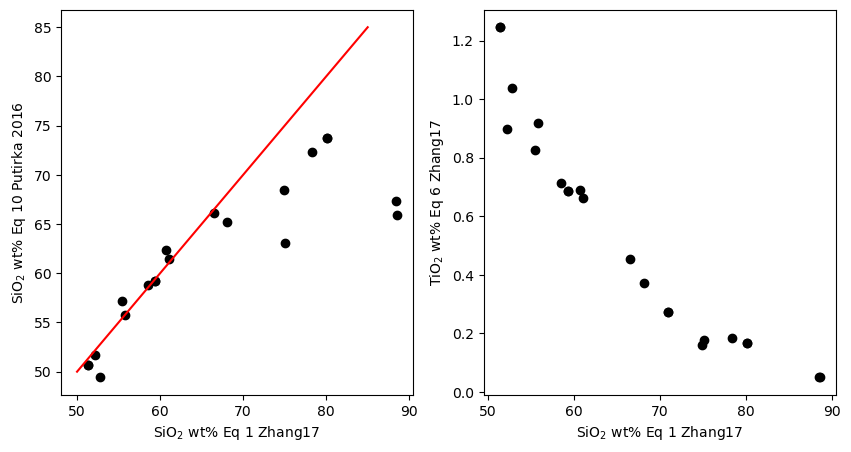

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Melt_Comps3['SiO2_Eq1_Zhang17'], Melt_Comps3['SiO2_Eq10_Put2016'], 'ok')
ax1.set_xlabel('SiO$_2$ wt% Eq 1 Zhang17')
ax1.set_ylabel('SiO$_2$ wt% Eq 10 Putirka 2016')

ax2.plot(Melt_Comps3['SiO2_Eq1_Zhang17'], Melt_Comps3['TiO2_Eq6_Zhang17'], 'ok')
ax2.set_xlabel('SiO$_2$ wt% Eq 1 Zhang17')
ax2.set_ylabel('TiO$_2$ wt% Eq 6 Zhang17')

ax1.plot([50, 85], [50, 85], '-r')